In [ ]:
import numpy as np
import matplotlib.pylab as plt
from numpy import math
from scipy.optimize import curve_fit
import seaborn as sns
from scipy import stats
from scipy.stats import *
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize
!pip install emcee
!pip install corner
import emcee
import seaborn as sns
import corner
import pymc3 as pm

     |████████████████████████████████| 51kB 2.8MB/s 


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Howell1.txt to Howell1.txt


In [ ]:
#Calcular la distribución binomial
def dbinom(w,n,p):
  return np.math.factorial(n)/(np.math.factorial(w)*(np.math.factorial(abs(n-w))))*p**w*(1-p)**(n-w)

""" Logaritmo de la probabilidad"""  
def log_likelihood(theta,x,y,sigma):
  m, b, log_f = theta
  sn2=sigma**2+f_(x,m,b)**2*np.exp(2*log_f)
  return -0.5*sum((y-f_(x,m,b))**2/sn2+ np.log(2*np.pi*sn2))
# El logaritmo se debe que la función recibe el logaritmo de 



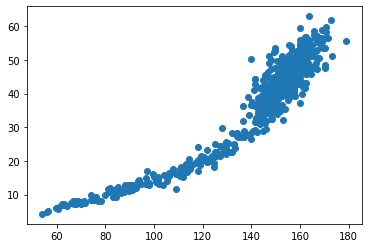

In [ ]:
#height,weight,age,male=
Dat=np.loadtxt('Howell1.txt', comments='#',delimiter=';',skiprows=1)
height,weight,age,male=Dat[:,0],Dat[:,1],Dat[:,2],Dat[:,3]
plt.plot(height,weight, 'o')

#Alturas para  mayores a 18 años

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


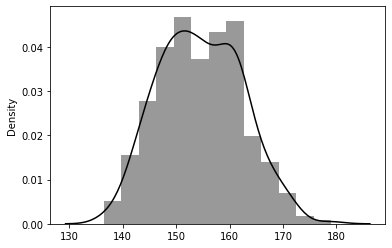

In [ ]:
d=Dat[age>=18]
d2=d[:,0]


#ajuste lineal curve fit


def func(x, a, b):
    return a*x + b


popt, pcov = curve_fit(func, d[:,0], d[:,1])

sns.distplot(d2,color='k')


Modelo

In [ ]:

def f_(x,m,b):
  return m*x+b

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


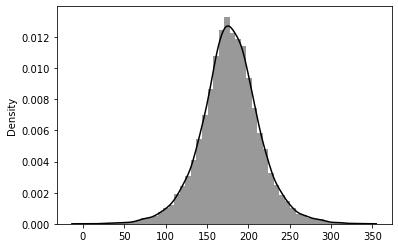

In [ ]:
N=int(1e4)
mu = np.random.normal(178, 20, N) # Media de las alturas de los adultos
sigma = np.random.uniform(0, 50.0, N) # Desviacion de las alturas de los adultos
prior_h=np.random.normal(mu, sigma, N) # previa
sns.distplot(prior_h,color='k')


In [ ]:
print('la media y la desviacion estandar de mu son',np.mean(mu),np.std(mu))
print('la media y la desviacion estandar de sigma son',np.mean(sigma),np.std(sigma))

la media y la desviacion estandar de mu son 178.14219950919536 20.073689103241936
la media y la desviacion estandar de sigma son 25.164182556987868 14.514778620263835


In [ ]:
""" Logaritmo de la probabilidad"""  
def logpp(x,y,sigma,m,b,f):
  sn_2=sigma**2+f_(x,m,b)**2*np.exp(2*f)
  return -0.5*sum((y-f_(x,m,b))**2/sn_2+np.log(2*np.pi*sn_2))
# El logaritmo se debe que la función recibe el logaritmo de f

#Aproximacion de cuadricula

#Aproximacion cuadratica

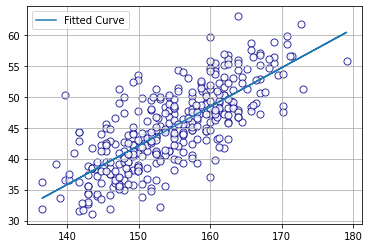

In [ ]:
plt.plot(d[:,0], func(d[:,0], *popt), label="Fitted Curve")
plt.scatter(d[:,0],d[:,1],s=50,c='w',edgecolors='darkblue',alpha=0.8)
plt.legend()
plt.grid()

In [ ]:
m,b=popt
b

-52.31617781352801

#MLE

In [ ]:
#Parametros 

m,b=popt                      # intersección con el eje y
f=10.0
N=len(d)

#Variables
 # ""   ""   ""    ""    ""     ""   que tienen una distribución normal 

mu = np.random.normal(178, 20, N) # Media de las alturas de los adultos
sigma = np.random.uniform(0, 50.0, N) # Desviacion de las alturas de los adultos
prior_h=np.random.normal(mu, sigma, N) # previa


x=d[:,0]
y=d[:,1]
yerr=0.8+0*x


In [ ]:
popt

array([  0.62942104, -52.31617781])

In [ ]:
np.random.seed(42)


nll=lambda *args: -log_likelihood(*args) # Construccion lamda 

#Condiciones iniciales

In=np.array([m,b,np.log(f)])+ 0.1 * np.random.randn(3)

#Solución
Sol=minimize(nll,In,args=(x, y, yerr))
# Extrayendo los valores
m2, b2, log_f2 = Sol.x
In

array([  0.67909246, -52.33000424,   2.36735395])

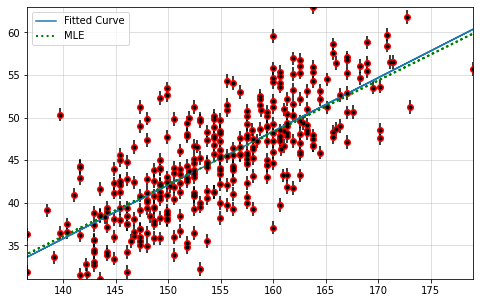

In [ ]:
# Graficos
plt.figure(figsize=(8,5))
plt.plot(x,y,'ro')
plt.plot(d[:,0], func(d[:,0], *popt), label="Fitted Curve")
plt.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0) #Grafica la muetras con su respectivo error
#plt.plot(x,f_(x,m,b),'k',alpha=0.5,lw=3,label='Recta verdadera')
plt.plot(x,f_(x,m2,b2),':g',alpha=1.0,lw=2,label='MLE')
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.legend()
plt.grid(alpha=0.5)

In [ ]:
"""función prior"""
# theta es un arreglo con los valores de las contantes m,b,f
def log_p (theta):
  m, b, log_f = theta
  if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
      return 0.0
  return -np.inf
# log probabilidad
def log_probability(theta, x, y, yerr):
    lp = log_p(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr) # aun nos e porque se suman




#Marginalización

In [ ]:
Sol.x,b,m,f

(array([  0.60918986, -49.20181598,  -2.36070698]),
 -52.31617781352801,
 0.6294210433607557,
 10.0)

http://albertotb.com/Equivalence-between-distribution-functions-in-R-and-Python/


http://mathesaurus.sourceforge.net/r-numpy.html


100%|██████████| 5000/5000 [00:03<00:00, 1517.88it/s]


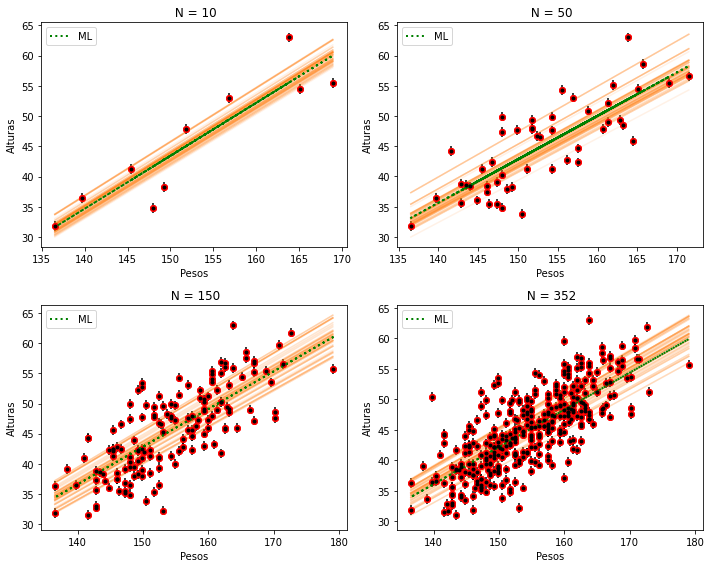

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [ ]:
N=int(len(d)) # numero de elementos en el arreglo
nn=np.array([10,50,150,352])



#Gráfica de los datos
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 8))
for i, ax in enumerate(axes.flat, start=1):
    N=nn[i-1]
    x=d[:,0]
    x=x[0:N]
    y=d[:,1]
    y=y[0:N]
    yerr=0.8+0*x

    Sol=minimize(nll,In,args=(x, y, yerr))
    # Extrayendo los valores
    m2, b2, log_f2 = Sol.x
    pos = Sol.x + 1e-2 * np.random.randn(32, 3)  # posterior ,randn genera 3 arreglos de 32 n umeros aleatorios
    nwalkers, ndim = pos.shape # 32 caminos, 3 dimensión 

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
    sampler.run_mcmc(pos, 5000, progress=True);

    samples = sampler.get_chain()
    flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
    x0 = np.linspace(min(x), max(x), len(x),len(x))
    plt.figure(figsize=(8,5))
    inds = np.random.randint(len(flat_samples), size=100)
    for ind in inds:
        sample = flat_samples[ind]
        ax.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
    ax.plot(x,y,'ro')

    ax.plot(x,y,'ro')
    #ax.plot(d[:,0], func(d[:,0], *popt), label="Fitted Curve")
    ax.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0) #Grafica la muetras con su respectivo error
    #plt.plot(x,f_(x,m,b),'k',alpha=0.5,lw=3,label='Recta verdadera')
    ax.plot(x,f_(x,m2,b2),':g',alpha=1.0,lw=2,label='ML')  
#    ax.plot(x,func(y, *popt))
#    ax.set_title("  ".join(Dat))
    ax.set_title(" N = "+(str(nn[i-1])))
    ax.set_xlabel('Pesos')
    ax.set_ylabel('Alturas')
    ax.legend()
fig.tight_layout()

plt.show()

In [ ]:
pos = Sol.x + 1e-2 * np.random.randn(52, 3)  # posterior ,randn genera 3 arreglos de 32 n umeros aleatorios
nwalkers, ndim = pos.shape # 32 caminos, 3 dimensión 

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:04<00:00, 1180.65it/s]


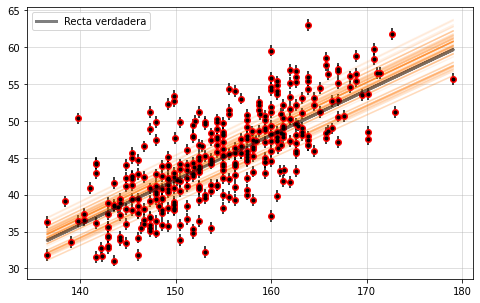

In [ ]:
samples = sampler.get_chain()
flat_samples = sampler.get_chain(discard=10, thin=25, flat=True)
x0 = np.linspace(min(x), max(x), len(x),len(x))
plt.figure(figsize=(8,5))
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.plot(x,y,'ro')
#ax.fill_between(p_[(p_<=xx_max[i]) & (p_>=xx_min[i])],posterior(3,3,p_)[(p_<=xx_max[i]) & (p_>=xx_min[i])])
plt.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0) #Grafica la muetras con su respectivo error
plt.plot(x,f_(x,0.608,-49.203),'k',alpha=0.5,lw=3,label='Recta verdadera')
#plt.plot(x,f_(x,m1,b1),'k--',alpha=1.0,lw=2,label='minimos cuadrados')
#plt.plot(x,f_(x,m2,b2),':g',alpha=1.0,lw=2,label='ML')
#plt.xlim(min(x),max(x))
#plt.ylim(min(y),max(y))
plt.legend()
plt.grid(alpha=0.5)


Ajuste cuadratico

In [ ]:

def f_(x,m,b,c):
  return m*x+b*x**2+c
####
def func(x, a, b,c):
    return a*x + b*x**2+c
####

def log_likelihood(theta,x,y,sigma):
  m, b,c,log_f = theta
  sn2=sigma**2+f_(x,m,b,c)**2*np.exp(2*log_f)
  return -0.5*sum((y-f_(x,m,b,c))**2/sn2+ np.log(2*np.pi*sn2))
# El logaritmo se debe que la función recibe el logaritmo de 
popt, pcov = curve_fit(func, Dat[:,0], Dat[:,1])

"""función prior"""
# theta es un arreglo con los valores de las contantes m,b,f
def log_p (theta):
  m, b,c, log_f = theta
  if -5.0 < m < 0.5 and 0.0 < b < 10.0 and  0.0< b <10.0 and -10.0 < log_f < 1.0:
      return 0.0
  return -np.inf
# log probabilidad
def log_probability(theta, x, y, yerr):
    lp = log_p(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr) # aun nos e porque se suman

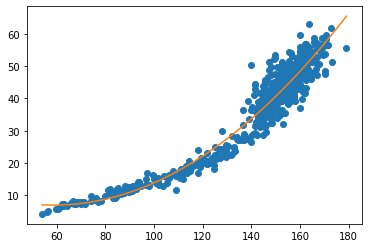

In [ ]:
#Parametros 

m,b,c=popt                      # intersección con el eje y
f=0.50
N=len(Dat)

#Variables
 # ""   ""   ""    ""    ""     ""   que tienen una distribución normal 

mu = np.random.normal(178, 20, N) # Media de las alturas de los adultos
sigma = np.random.uniform(0, 50.0, N) # Desviacion de las alturas de los adultos
prior_h=np.random.normal(mu, sigma, N) # previa


x=Dat[:,0]
y=Dat[:,1]
yerr=0.8+0*x
x0=np.linspace(min(x),max(x),len(x))
plt.plot(x,y,'o')
plt.plot(x0,func(x0,*popt))

In [ ]:
nll=lambda *args: -log_likelihood(*args) # Construccion lamda 

#Condiciones iniciales

In=np.array([m,b,c,np.log(f)])+ 0.1 * np.random.randn(4)

#Solución
Sol=minimize(nll,In,args=(x, y, yerr))
# Extrayendo los valores
m2, b2, c2,log_f2 = Sol.x
print('los valores de las constantes a,b,c, log(f)  son :',In)

los valores de las constantes a,b,c, log(f)  son : [-2.85886200e-01  1.54947866e-02  2.07571700e+01 -5.55693835e-01]


In [ ]:
pos = Sol.x + 1e-3 * np.random.randn(52, 4)  # posterior ,randn genera 4 arreglos de 32 n umeros aleatorios
nwalkers, ndim = pos.shape # 32 caminos, 4 dimensión 

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:44<00:00, 111.35it/s]


(0.0, 62.992589)

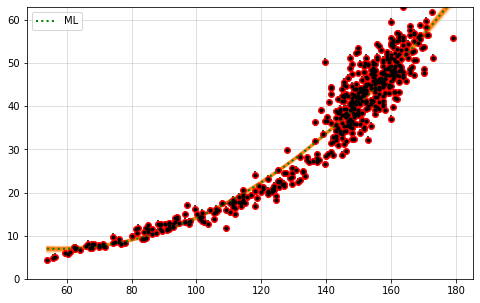

In [ ]:
samples = sampler.get_chain()
flat_samples = sampler.get_chain(discard=100, thin=25, flat=True)
x0 = np.linspace(min(x), max(x), len(x),len(x))
plt.figure(figsize=(8,5))
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, f_(x0,flat_samples[ind,0],flat_samples[ind,1],flat_samples[ind,2]), "C1", alpha=0.1)
plt.plot(x,y,'ro')
#ax.fill_between(p_[(p_<=xx_max[i]) & (p_>=xx_min[i])],posterior(3,3,p_)[(p_<=xx_max[i]) & (p_>=xx_min[i])])
plt.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0) #Grafica la muetras con su respectivo error
plt.plot(x0,f_(x0,m2,b2,c2),':g',alpha=1.0,lw=2,label='ML')
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(0,max(y))

(0.0, 62.992589)

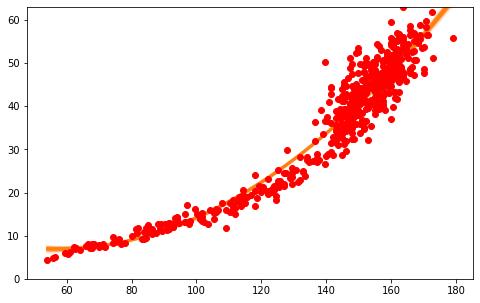

In [ ]:
plt.figure(figsize=(8,5))
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, f_(x0,flat_samples[ind,0],flat_samples[ind,1],flat_samples[ind,2]), "C1", alpha=0.1)
plt.plot(x,y,'ro')
plt.ylim(0,max(y))